<a href="https://colab.research.google.com/github/Afuhnwi-Afriitech/heart-disease-2/blob/main/heart_disease_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn models
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaulation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease.shape

(303, 14)

In [4]:
heart_disease["target"].value_counts()

,count
target,
1,165
0,138


In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_disease.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


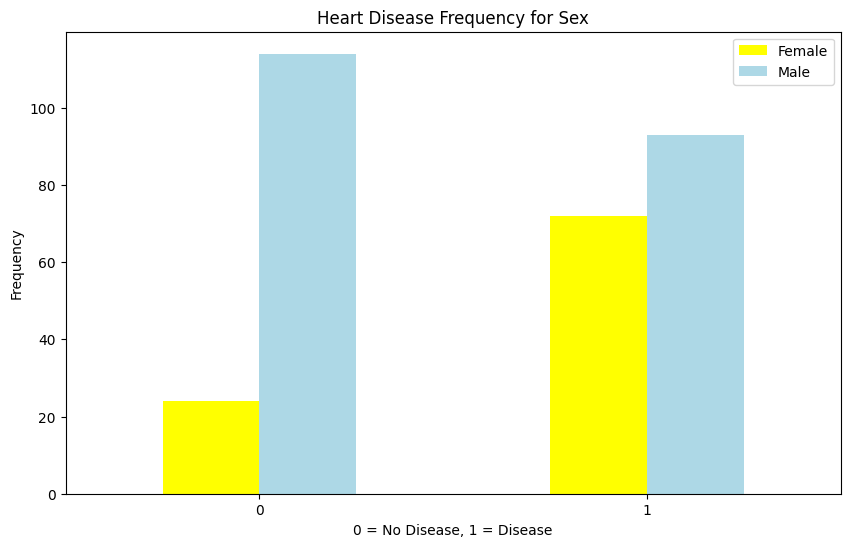

In [7]:
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind="bar", figsize=(10, 6), color=["yellow", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

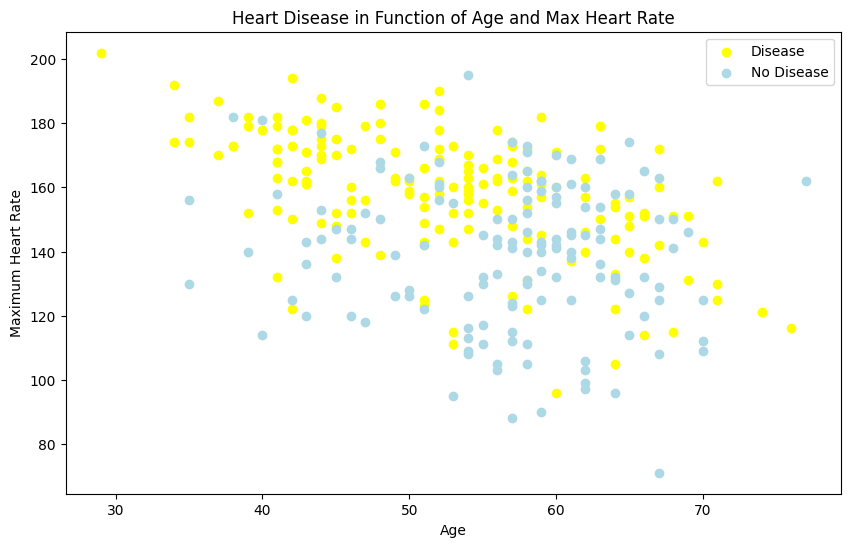

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(heart_disease.age[heart_disease.target == 1], heart_disease.thalach[heart_disease.target == 1], c="yellow")
plt.scatter(heart_disease.age[heart_disease.target == 0], heart_disease.thalach[heart_disease.target == 0], c="lightblue")
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Heart Disease in Function of Age and Max Heart Rate");

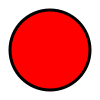

In [16]:
from IPython.display import SVG, display

# From a file
display(SVG(filename='ml_map.svg'))

# Or directly from SVG string
display(SVG("""<svg height="100" width="100">
  <circle cx="50" cy="50" r="40" stroke="black"
  stroke-width="3" fill="red" />
</svg>"""))


In [25]:
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)
random_forest_model.score(x_test, y_test)

0.8524590163934426

In [26]:
np.random.seed(42)
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
logistic_regression_model.score(x_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

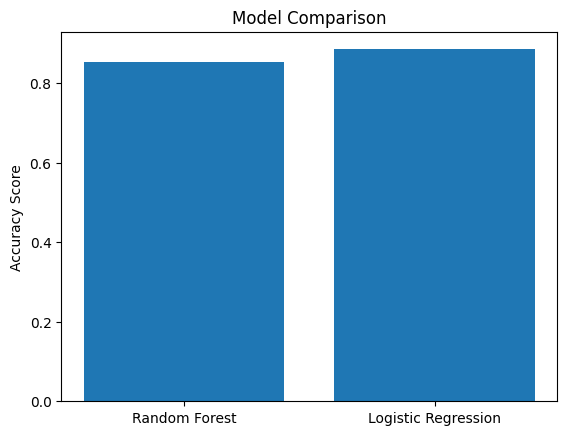

In [32]:
models = ['Random Forest', 'Logistic Regression']
scores = [random_forest_model.score(x_test, y_test),
          logistic_regression_model.score(x_test, y_test)]

plt.bar(models, scores)
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.show()

In [37]:
from sklearn.metrics import classification_report
y_preds_for_randomForest = random_forest_model.predict(x_test)
print(classification_report(y_test, y_preds_for_randomForest))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [38]:
y_preds_for_logisticRegression = logistic_regression_model.predict(x_test)
print(classification_report(y_test, y_preds_for_logisticRegression))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



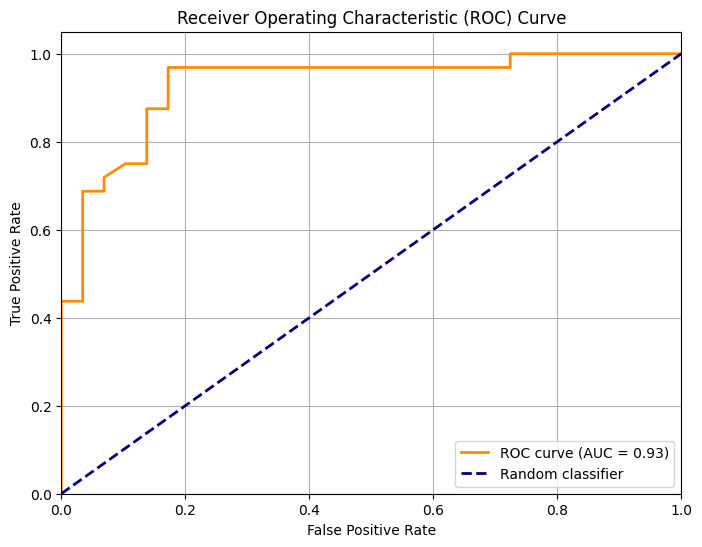

In [42]:
from sklearn.metrics import auc

y_pred_proba = random_forest_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

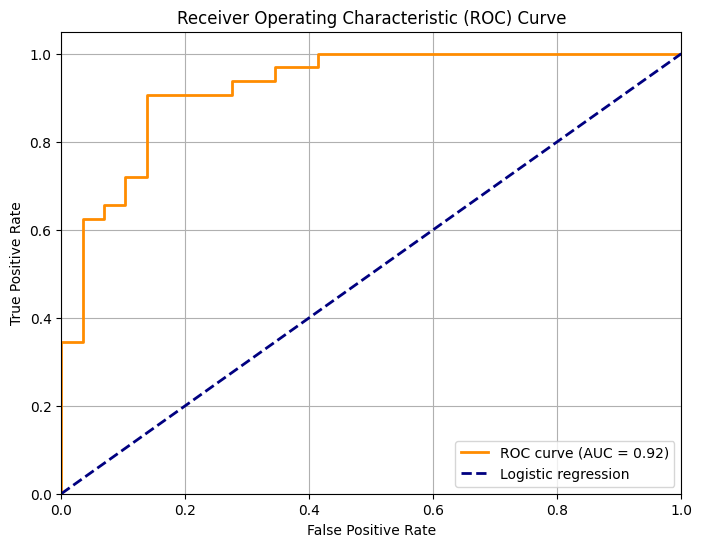

In [44]:
y_pred_proba = logistic_regression_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Logistic regression')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

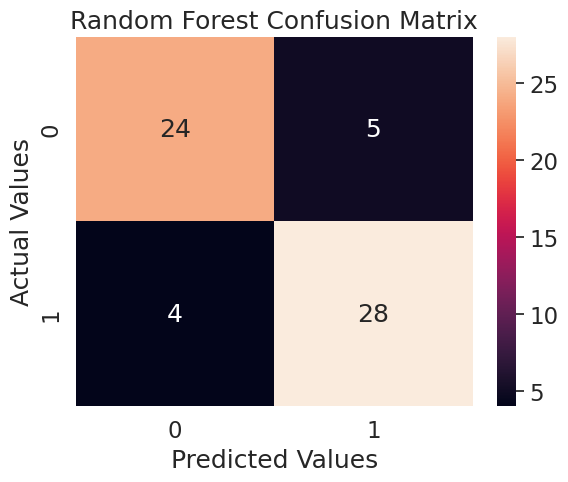

In [47]:
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test, y_preds, title):
    cm = confusion_matrix(y_test, y_preds)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(title)
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
plot_confusion_matrix(y_test, y_preds_for_randomForest, "Random Forest Confusion Matrix")

In [48]:
import pickle
regression_model = pickle.dump(logistic_regression_model, open("logistic_regression_model_1.pkl", "wb"))
classifier_model = pickle.dump(random_forest_model, open("random_forest_model_1.pkl", "wb"))

In [49]:
model = pickle.load(open("logistic_regression_model_1.pkl", "rb"))
model.predict(x_test[:50])

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0])